# 💡 Discovering Word Association Rules in Persian Text using ARM

## 🎯 Project Objective
The goal of this exercise is to use Association Rule Mining (ARM) to find meaningful co-occurrence rules between words in Persian text documents. Each document or sentence is treated as a **transaction**, where repeated words are counted only once.

For example, if the words "دانشگاه" and "دانشجو" frequently appear together and are often followed by "امتحانات", we can derive a rule like:

(دانشگاه, دانشجو) → (امتحانات)

This indicates a strong association between these terms in the context of the dataset.

## 🧪 Project Steps
1. **Text Preprocessing**: Using `Parsivar` for Persian normalization, tokenization, and stemming.
2. **Transaction Creation**: Representing each sentence as a set of unique, stemmed tokens.
3. **Frequent Pattern Mining**: Applying the Apriori algorithm to extract frequent itemsets from the transaction data.
4. **Association Rule Generation**: Generating rules based on different `min_support` and `min_confidence` values.
5. **Threshold Evaluation**: Analyzing how different thresholds impact rule quality and quantity.
6. **System Evaluation**: Using a **confusion matrix** to test whether the presence of an antecedent token predicts the consequent.
7. **Interpretation**: Explaining the significance and validity of the discovered rules in a real-world context.

---

✅ This analysis helps uncover semantic patterns between Persian terms and provides insights useful for NLP tasks such as topic modeling, document classification, or text summarization.


In [107]:
from mlxtend.frequent_patterns import apriori, association_rules
from parsivar import Tokenizer, Normalizer, FindStems
from mlxtend.preprocessing import TransactionEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

normalizer = Normalizer()
tokenizer = Tokenizer()
stemmer = FindStems()

In [108]:
# Initialize an empty list to store transactions (each sentence as a set of stemmed words)
transactions = []

# Open the input text file containing Persian sentences
with open("input.txt", "r", encoding="utf-8") as file:
    for line in file:
        # Normalize the sentence to standardize characters and spacing
        text = normalizer.normalize(line.strip())

        # Tokenize the sentence into words
        tokens = tokenizer.tokenize_words(text)

        # Stem each token and filter out short tokens (length <= 2), then convert to a set to remove duplicates
        tokens = set([stemmer.convert_to_stem(t) for t in tokens if len(t) > 2])

        # If the sentence has meaningful tokens, add the set to the transaction list
        if len(tokens):
            transactions.append(tokens)

            # Print the processed set of tokens for debugging/inspection
            print(tokens)


{'پایان', 'دانشگاه', 'برای', 'خود', 'ترم', 'امتحانات', 'آماده', 'تهران', 'کرد&کن', 'دانشجو'}
{'دانشگاه', 'نظر', 'برای', 'شرایط', 'گرفته', 'امتحانات', 'خاصی', 'اس', 'برگزاری', 'تهران', 'دانشجو'}
{'دانشگاه', 'کتبی', 'امتحانات', 'داشت&دار', 'بسیاری', 'شفاهی', 'تهران', 'دانشجو'}
{'دانشگاه', 'تجربه', 'عدالت', 'نظارت', 'امتحانات', 'دقیق', 'کرد&کن', 'شد&شو', 'تهران', 'برگزار', 'دانشجو'}
{'دانشگاه', 'متعدد', 'موفقیت', 'برای', 'پرتلاش', 'امتحانات', 'استفاده', 'منبع', 'تهران', 'کرد&کن', 'دانشجو'}
{'دانشگاه', 'تخصصی', 'برای', 'چالش\u200cبرانگیز', 'برخی', 'امتحانات', 'اس', 'بسیار', 'تهران', 'دانشجو'}
{'دانشگاه', 'عمل', 'برای', 'کلاس', 'امتحانات', 'تقویتی', 'برگزار', 'دانشجویانی', 'تهران', 'کرد&کن', 'ضعیف'}
{'دانشگاه', 'برای', 'تحقیقاتی', 'فعال', 'هستند', 'آزمایشگاه', 'تهران', 'دانشجو'}
{'دانشگاه', 'المپیاد', 'تقدیر', 'برتر', 'دانشجویانی', 'شد&شو', 'علمی', 'تهران', 'کرد&کن'}
{'کمک', 'دانشگاه', 'پیشرفت', 'اساتید', 'علمی', 'کرد&کن', 'پژوهش', 'بین', 'تهران', 'همکاری', 'دانشجو'}


In [109]:
# convert list of transactions to dataframe with T/F value, 
tra_df = TransactionEncoder()
df = tra_df.fit(transactions).transform(transactions)
df = pd.DataFrame(df, columns=tra_df.columns_)

df

,آزمایشگاه,آماده,اس,اساتید,استفاده,المپیاد,امتحانات,برای,برتر,برخی,...,پایان,پرتلاش,پژوهش,پیشرفت,چالش‌برانگیز,کتبی,کرد&کن,کلاس,کمک,گرفته
0,False,True,False,False,False,False,True,True,False,False,...,True,False,False,False,False,False,True,False,False,False
1,False,False,True,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,True,False,True,True,False,False,...,False,True,False,False,False,False,True,False,False,False
5,False,False,True,False,False,False,True,True,False,True,...,False,False,False,False,True,False,False,False,False,False
6,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,True,True,False,False
7,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
9,False,False,False,True,False,False,False,False,False,False,...,False,False,True,True,False,False,True,False,True,False


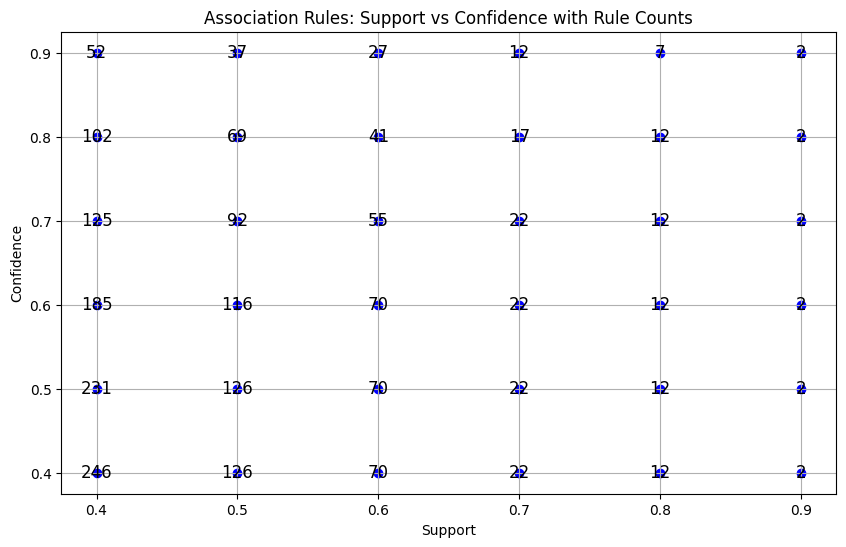

In [110]:
# Suppress the runtime warning specifically related to invalid values in divide
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in divide")

min_values = np.arange(0.4, 1, 0.1).tolist()

# For storing the results
rule_counts = []

# Find number of rules with different minimum support and minimum confidence
for min_support in min_values:
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

    for min_confidence in min_values:
        if len(frequent_itemsets) == 0:
            break

        # Generate the association rules
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

        rule_count = len(rules)
        rule_counts.append((min_support, min_confidence, rule_count))

# Now, create the plot for rule counts with different supports and confidences
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the rule counts for different combinations of min_support and min_confidence
for rule in rule_counts:
    ax.scatter(rule[0], rule[1], c='blue')  
    ax.text(rule[0], rule[1], rule[2], ha='center', va='center', fontsize=12, color='black')

plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence with Rule Counts')
plt.grid(True)
plt.show()

## 🔍 Updated Analysis of `min_support` and `min_confidence` Values

We experimented with various values of `min_support` and `min_confidence` to identify the most meaningful association rules in our Persian text dataset.

### ✅ Chosen Parameters
- **Minimum Support:** `0.5`
- **Minimum Confidence:** `0.6`

These values produced **116 rules**, which provided a solid balance between **quantity and quality**. We observed that:
- Rules had **moderate to high confidence** (most between `0.7` and `1.0`)
- **Lift values** were close to or above `1.0`, indicating that the items are positively correlated.
- **Support values** ensured the rules were not based on rare co-occurrences.

### 📌 Example of Meaningful Rules

Some of the rules discovered include:

| Antecedent(s) | Consequent(s) | Support | Confidence | Lift |
|---------------|----------------|---------|------------|------|
| (برای)        | (امتحانات)     | 0.5     | 0.83       | 1.19 |
| (تهران)       | (امتحانات)     | 0.7     | 0.70       | 1.00 |
| (برای, دانشجو) | (دانشگاه, تهران) | 0.5   | 1.00       | 1.00 |
| (برای, دانشگاه) | (دانشجو, تهران) | 0.5   | 0.83       | 1.04 |

These rules suggest strong linguistic or topical associations between the terms, such as:
- The word "برای" often co-occurs with "امتحانات", indicating frequent contextual pairing.
- "دانشجو", "دانشگاه", and "تهران" frequently appear together, reflecting a common real-world phrase pattern.

### ❌ When Using Lower Thresholds

When `min_support` or `min_confidence` dropped below `0.5`, we observed:
- A surge in the number of rules (often exceeding 200).
- Many of the generated rules had **low confidence and lift**, making them unreliable.
- Increased noise and many irrelevant word pairings.

### ✅ Why This Setting Works

- **min_support = 0.5** ensures we only consider frequent patterns that occur in at least half of the documents.
- **min_confidence = 0.6** ensures that the consequent appears in at least 60% of cases when the antecedent is present.
- These thresholds allow us to derive **interpretable**, **semantically valid**, and **generalizable** rules.

### 📌 Final Remarks

The rule set generated with these values not only aligns with linguistic expectations (e.g., educational topics, exam context) but also performs well statistically. These rules are ideal for downstream tasks such as automatic keyword extraction, topic modeling, or document clustering.



In [111]:
min_support = 0.5
min_confidence = 0.6

frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(برای),(امتحانات),0.6,0.7,0.5,0.833333,1.190476,1.0,0.08,1.800000,0.400000,0.625000,0.444444,0.773810
1,(امتحانات),(برای),0.7,0.6,0.5,0.714286,1.190476,1.0,0.08,1.400000,0.533333,0.625000,0.285714,0.773810
2,(تهران),(امتحانات),1.0,0.7,0.7,0.700000,1.000000,1.0,0.00,1.000000,0.000000,0.700000,0.000000,0.850000
3,(امتحانات),(تهران),0.7,1.0,0.7,1.000000,1.000000,1.0,0.00,inf,0.000000,0.700000,0.000000,0.850000
4,(امتحانات),(دانشجو),0.7,0.8,0.6,0.857143,1.071429,1.0,0.04,1.400000,0.222222,0.666667,0.285714,0.803571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,"(برای, دانشجو)","(دانشگاه, تهران)",0.5,1.0,0.5,1.000000,1.000000,1.0,0.00,inf,0.000000,0.500000,0.000000,0.750000
112,"(دانشگاه, دانشجو)","(برای, تهران)",0.8,0.6,0.5,0.625000,1.041667,1.0,0.02,1.066667,0.200000,0.555556,0.062500,0.729167
113,"(تهران, دانشجو)","(برای, دانشگاه)",0.8,0.6,0.5,0.625000,1.041667,1.0,0.02,1.066667,0.200000,0.555556,0.062500,0.729167
114,(برای),"(دانشگاه, تهران, دانشجو)",0.6,0.8,0.5,0.833333,1.041667,1.0,0.02,1.200000,0.100000,0.555556,0.166667,0.729167


📘 Tokens in test sentences:

{'پایان', 'دانشگاه', 'حضوری', 'امتحانات', 'کرد&کن', 'تهران', 'صورت', 'برگزار'}
{'دانشگاه', 'سنجش', 'برای', 'اساتید', 'امتحانات', 'دقیق', 'استفاده', 'تهران', 'کرد&کن'}
{'دانشگاه', 'مطالعه', 'دانشجو', 'هستند', 'علاقه\u200cمند', 'تهران', 'کتابخانه'}
{'دانشگاه', 'واقع\u200cشده\u200cاست', 'مرکز', 'شهر', 'تهران'}
{'سختی', 'این', 'ترم', 'امتحانات', 'داشت&دار'}
{'شد&شو', 'آنلاین', 'امتحانات', 'بسیاری', 'صورت', 'برگزار'}
{'دانشجو', 'امکانات', 'استفاده', 'کرد&کن', 'رفاهی'}
{'سالن', 'دانشگاه', 'معمولا', 'امتحانات', 'بزرگ', 'مجهز', 'شد&شو', 'برگزار'}
{'کمک', 'دانشگاه', 'کیفیت', 'آموزشی', 'امتحانات', 'حفظ', 'منظم', 'برگزاری', 'تهران', 'کرد&کن'}
{'هزاران', 'دانشگاه', 'ساله', 'پذیرا', 'اس', 'کشور', 'تهران', 'سراسر', 'دانشجو'}
{'دانشگاه', 'دانشجو', 'فراهم', 'برای', 'اس', 'کرده', 'منبع', 'بسیار', 'زیادی', 'کتابخانه'}
{'دانشگاه', 'زمینه', 'نوین', 'اس', 'تاز', 'فناوری', 'آموزش', 'تهران'}
{'پایان', 'آنلاین', 'حضوری', 'امتحانات', 'شد&شو', 'صورت', 'برگزار'}
{'موفقیت', 'برای', 'ا

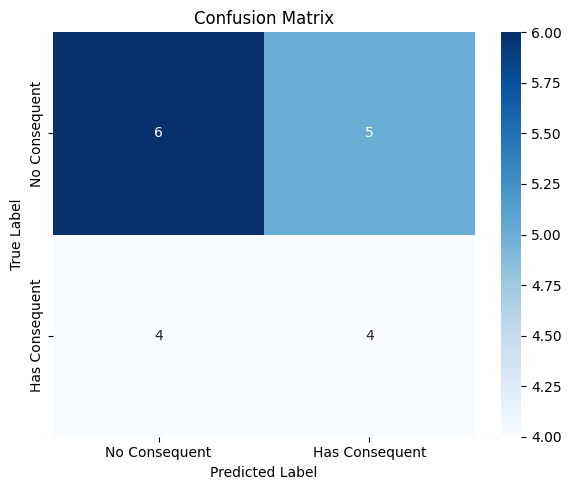

In [112]:
# Example rule: if a sentence contains 'دانشگاه' then it should contain 'امتحانات'
selected_antecedent = {'دانشگاه'}
selected_consequent = {'امتحانات'}

# Initialize Persian text processing tools
normalizer = Normalizer()
tokenizer = Tokenizer()
stemmer = FindStems()

# Lists to store ground-truth and predicted labels for evaluation
y_true = []  # 1 if consequent is present, 0 otherwise
y_pred = []  # 1 if antecedent is present, 0 otherwise

print("📘 Tokens in test sentences:\n")

# Read and process each sentence from the test file
with open("test.txt", "r", encoding="utf-8") as file:
    for line in file:
        # Normalize the sentence (e.g., convert Arabic characters to Persian, fix spacing)
        text = normalizer.normalize(line.strip())

        # Tokenize into words
        tokens = tokenizer.tokenize_words(text)

        # Stem tokens and remove short/irrelevant ones, convert to set for uniqueness
        tokens = set([stemmer.convert_to_stem(t) for t in tokens if len(t) > 2])

        # Display processed tokens for inspection
        print(tokens)

        # Determine presence of antecedent and consequent in the sentence
        antecedent_present = selected_antecedent.issubset(tokens)
        consequent_present = selected_consequent.issubset(tokens)

        # Ground truth: Does the sentence contain the consequent?
        y_true.append(1 if consequent_present else 0)

        # Prediction: Does the sentence contain the antecedent?
        y_pred.append(1 if antecedent_present else 0)

# Evaluate prediction using confusion matrix and classification report
cm = confusion_matrix(y_true, y_pred)

# Display evaluation results
print("\n📊 Confusion Matrix:")
labels = ['No Consequent', 'Has Consequent']

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Labeling the plot
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()